### Southern Water Corp



---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data we will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data.

In [5]:
import os
os.chdir("C:\\Users\\pdoah\\OneDrive\\Desktop\\1614636602_Southern_Water_Corp_Case_Study")

In [6]:
dataframe_raw = pd.read_csv("DF_Raw_Data.csv")
dataframe_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [17]:
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [434]:
dataframe_stdev = pd.read_csv("DF_Rolling_stdev.csv")
dataframe_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


In [67]:
dataframe_stdev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2452 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2452 non-null   object 
 2   Volumetric Flow Meter 1  2452 non-null   float64
 3   Volumetric Flow Meter 2  2452 non-null   float64
 4   Pump Speed (RPM)         2452 non-null   float64
 5   Pump Torque              2452 non-null   float64
 6   Ambient Temperature      2452 non-null   float64
 7   Horse Power              2452 non-null   float64
 8   Pump Efficiency          2452 non-null   float64
 9   PUMP FAILURE (1 or 0)    2452 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 191.7+ KB


DF_Raw_Data and DF_Rolling_Stdev enabled us to better understand
what the dispersion of the data looks like when some of the noise is removed, but still retain the overall trend.

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

Hint: You might want to reference the following .plot function <a href = https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html> here </a> 


Text(0.5, 1.0, 'Raw dataframe line plot')

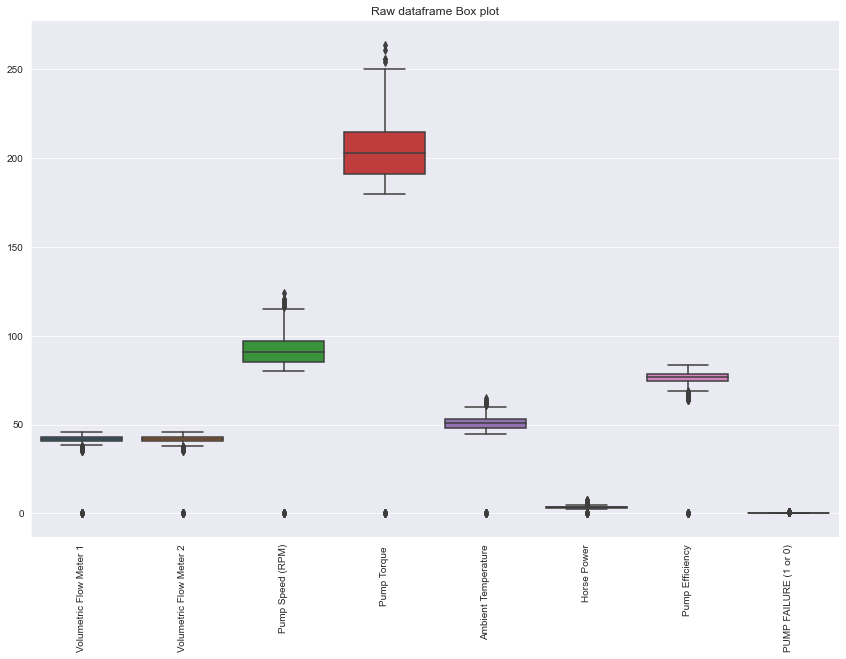

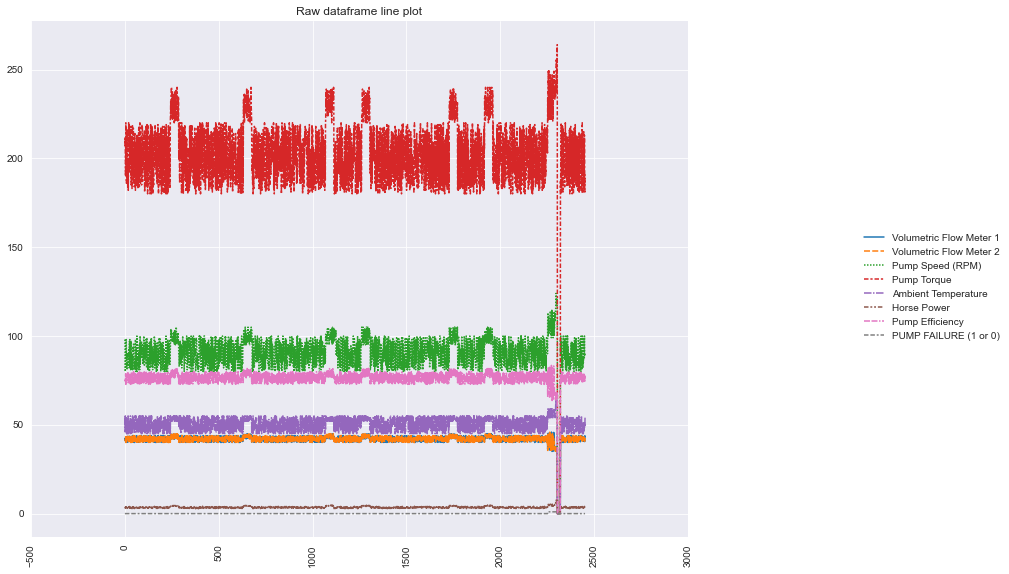

In [116]:
ax = sns.catplot(kind='box', data=dataframe_raw)
plt.gcf().set_size_inches(15, 8)
ax.set_xticklabels(rotation=90)
plt.title('Raw dataframe Box plot')

bx = sns.relplot(kind='line', data=dataframe_raw, linestyle='-')
plt.gcf().set_size_inches(15, 8)
bx.set_xticklabels(rotation=90)
plt.title('Raw dataframe line plot')

Text(0.5, 1.0, 'stdev dataframe line plot')

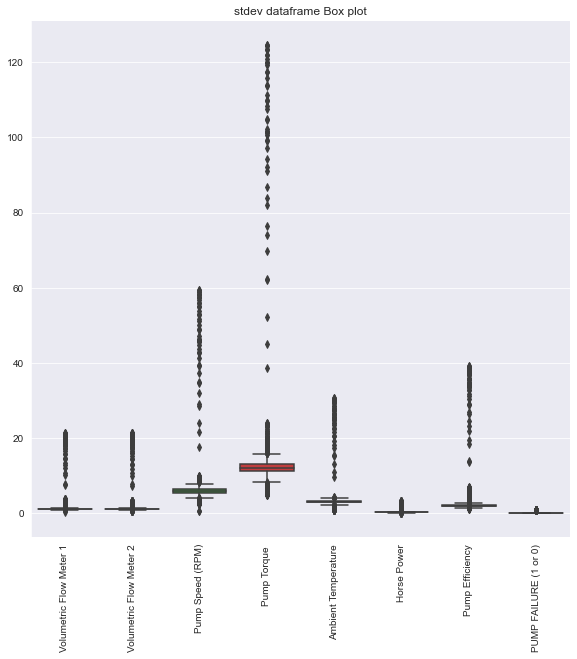

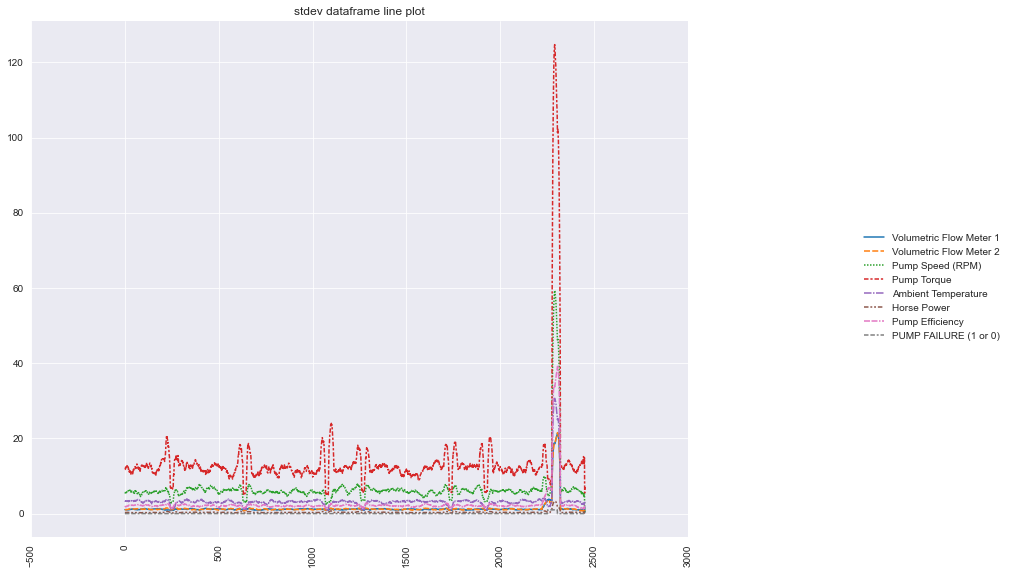

In [132]:
ax1=sns.catplot(kind='box', data=dataframe_stdev)
plt.gcf().set_size_inches(10, 8)
ax1.set_xticklabels(rotation=90)
plt.title('stdev dataframe Box plot')

bx1 = sns.relplot(kind='line', data=dataframe_stdev, linestyle='-')
plt.gcf().set_size_inches(15, 8)
bx1.set_xticklabels(rotation=90)
plt.title('stdev dataframe line plot')

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

In [ ]:
Our previous analyses have enabled us to pick up some trend(s) that seem a little odd. 
We have noted in particular certain variables trending upwards in relation to a Failure.

---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, we separated the datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge. 
    
This will require us to <b> SUBSET </b> the dataframe using *boolean filters*.


## Please put your code here

In [10]:
condition_1=dataframe_raw['PUMP FAILURE (1 or 0)'] == 0
condition_2=dataframe_raw['PUMP FAILURE (1 or 0)'] == 1
df= dataframe_raw[condition_1]
df1=dataframe_raw[condition_2]

Text(0.5, 1.0, 'Raw dataframe Box plot - Pump Failure = 1')

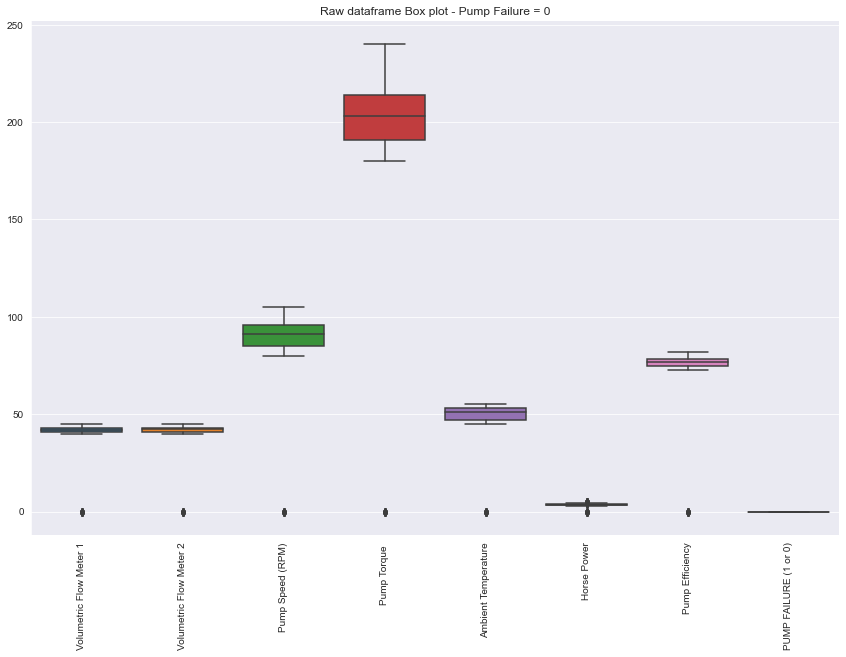

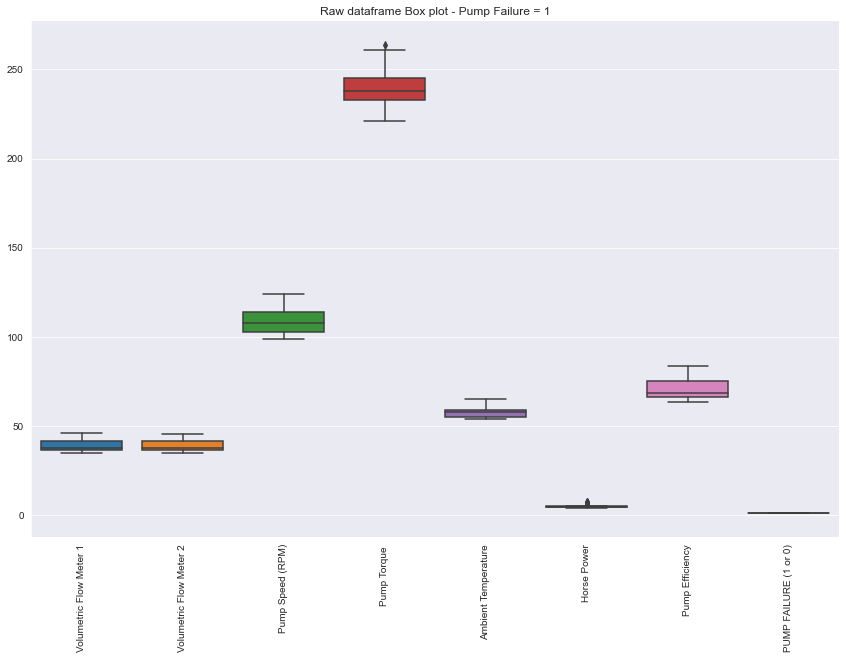

In [12]:
ds = sns.catplot(kind='box', data=df)
plt.gcf().set_size_inches(15, 8)
ds.set_xticklabels(rotation=90)
plt.title('Raw dataframe Box plot - Pump Failure = 0')

ds1 = sns.catplot(kind='box', data=df1)
plt.gcf().set_size_inches(15, 8)
ds1.set_xticklabels(rotation=90)
plt.title('Raw dataframe Box plot - Pump Failure = 1')

In [18]:
condition_3 = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0
condition_4 = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1
sf=dataframe_stdev[condition_3]
sf1=dataframe_stdev[condition_4]

Text(0.5, 1.0, 'Stdev dataframe Box plot - Pump Failure = 1')

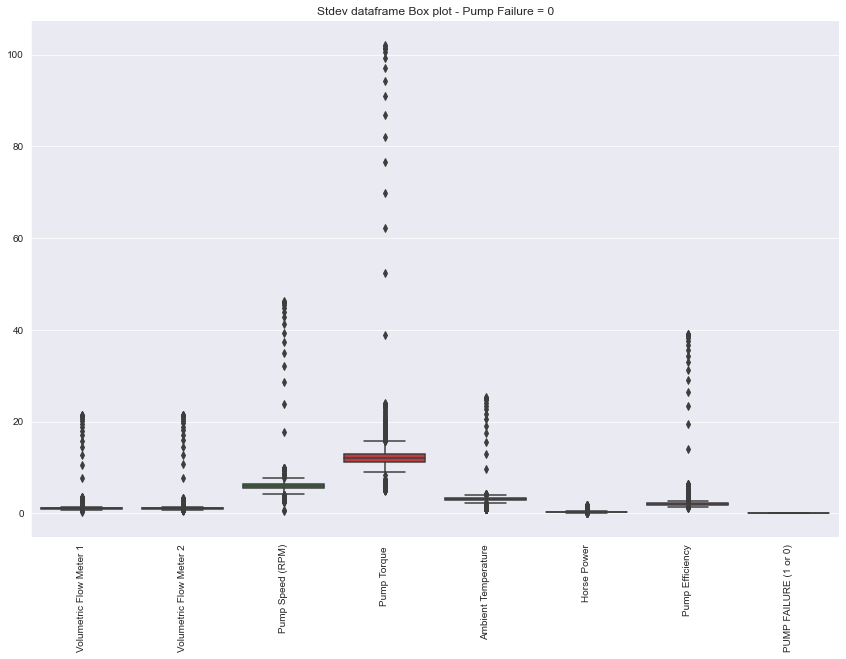

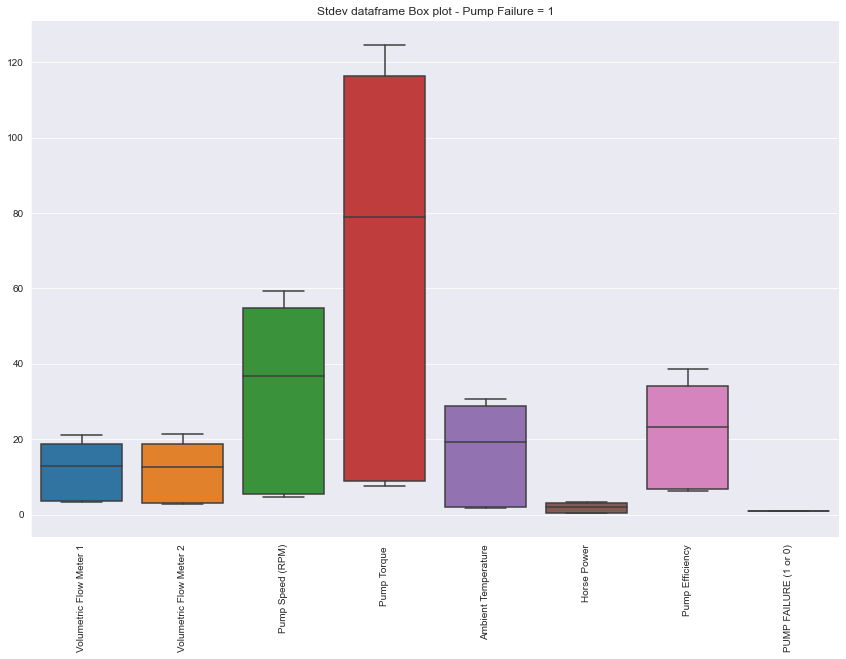

In [19]:
fs = sns.catplot(kind='box', data=sf)
plt.gcf().set_size_inches(15, 8)
fs.set_xticklabels(rotation=90)
plt.title('Stdev dataframe Box plot - Pump Failure = 0')

fs1 = sns.catplot(kind='box', data=sf1)
plt.gcf().set_size_inches(15, 8)
fs1.set_xticklabels(rotation=90)
plt.title('Stdev dataframe Box plot - Pump Failure = 1')

Rolling Standard Deviation, show a clear signature difference between that of normal behaviour and that of Failure
with Pump Torque, Pump Speed, Pump efficiency, Ambient temperature showing the 3 largest variances.

---------------------------------------------------------------------------

A quick analysis might show-case there are many *outliers* that exist in your dataset.

As you all know, outliers can easily *skew* your analysis. You might want to remove them.

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the DataFrame for outliers and remove them.
5. Calculate what the proportion of outliers exist (i.e. Number of entries left after outlier removal / Number of total entries in dataset). 


### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i)  <b> Q1 should contain the 25th percentile for all columns in the DataFrame. Q3 should contain the 75th percentile  for all the columns in the DataFrame.</b>


ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the DataFrame.

## Please put your code here

In [111]:
Q1=dataframe_raw.quantile(.25, axis = 0)
Q3=dataframe_raw.quantile(.75, axis = 0)

In [112]:
IQR = Q3 - Q1 
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

How to identify these outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the DataFrame to include *only* the outliers. How many outliers do we have?</b>
    
The syntax should look like this:
    
    Outliers = some_dataframe [ ((some_dataframe < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]
    
The .any(axis=1) indicates that for *any* entry in the columns that matches the criteria of being *less* than the lower limit or *greater* than the upper limit, for that column (axis=1), that row will be removed. 

Reference: <a href = https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python> here's </a>

<b> iii) What is the percentage of data that remains after we've removed the outliers from the dataframe_raw dataset?</b>
    

## Please put your code here

In [113]:
Lower_Limit = Q1 - 1.5*IQR
Upper_Limit = Q3 + 1.5*IQR

In [114]:
outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]

<ipython-input-114-e75f4dbfc862>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]
<ipython-input-114-e75f4dbfc862>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]


In [115]:
Percentage_of_Data_remaining = (2453 - 95) / 2453 * 100
Percentage_of_Data_remaining

96.12719119445576

Although they represent only 4% of our data, Removing the outliers is problematic because 
we will be unable to observe pump failure

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a box plot without outliers</span> 

## Please put your code here

In [116]:
no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]

<ipython-input-116-84e16fa74950>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]
<ipython-input-116-84e16fa74950>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]


In [58]:
condition_5 = no_outliers['PUMP FAILURE (1 or 0)'] == 0
condition_6 = no_outliers['PUMP FAILURE (1 or 0)'] == 1
rf=no_outliers[condition_5]
rf1=no_outliers[condition_6]

Text(0.5, 1.0, 'No Outliers Box plot - Pump Failure = 1')

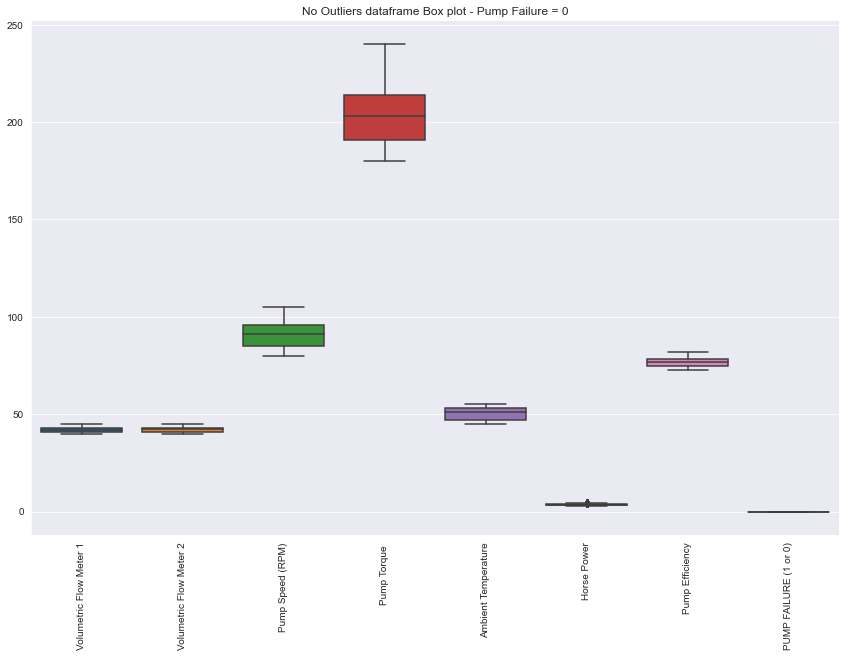

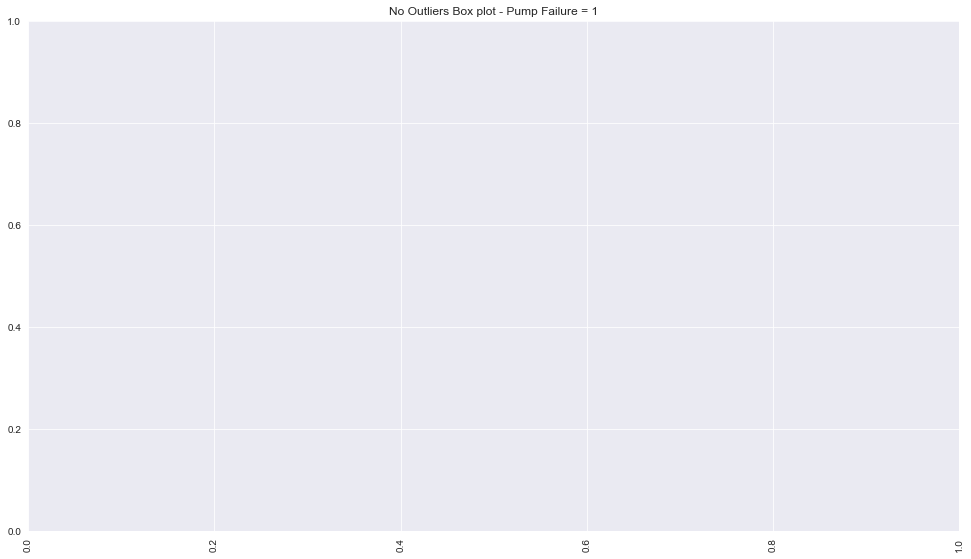

In [59]:
fr = sns.catplot(kind='box', data=rf)
plt.gcf().set_size_inches(15, 8)
fr.set_xticklabels(rotation=90)
plt.title('No Outliers dataframe Box plot - Pump Failure = 0')

fr1 = sns.catplot(kind='box', data=rf1)
plt.gcf().set_size_inches(15, 8)
fr1.set_xticklabels(rotation=90)
plt.title('No Outliers Box plot - Pump Failure = 1')

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 


In [106]:
dataframe_raw = pd.read_csv("DF_Raw_Data.csv", index_col='TIMEFRAME (DD/MM/YYYY)')

In [35]:
ListOfVariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Ambient Temperature', 'Horse Power', 
'Pump Efficiency', 'Pump Torque ']

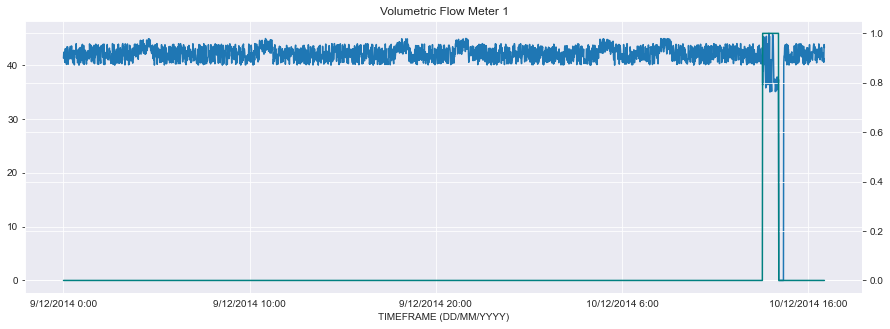

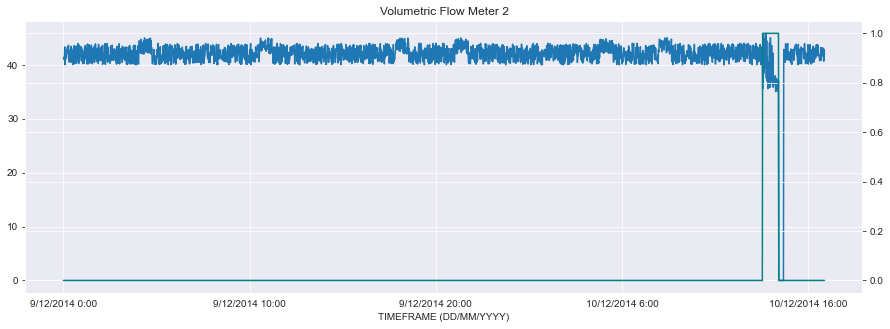

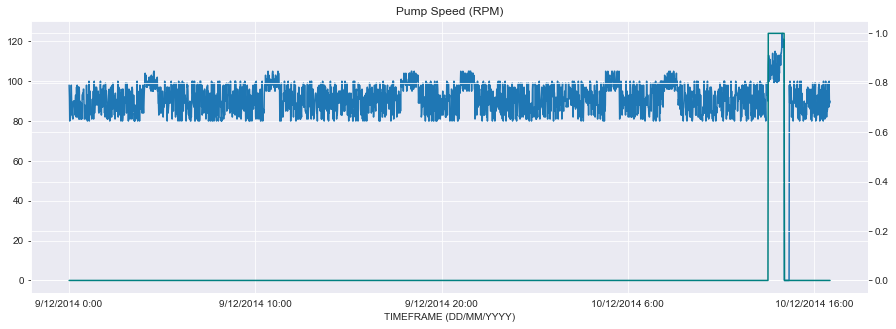

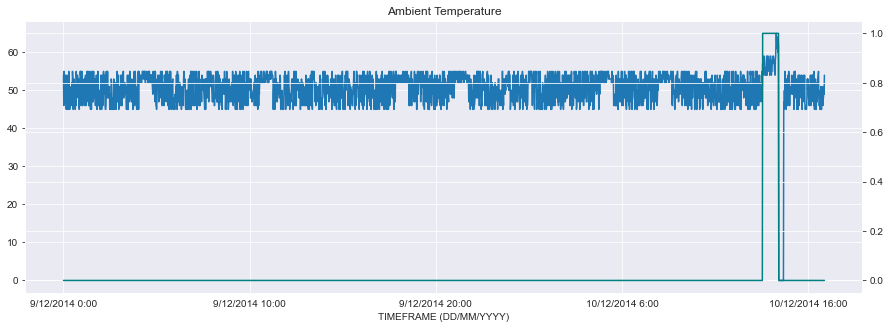

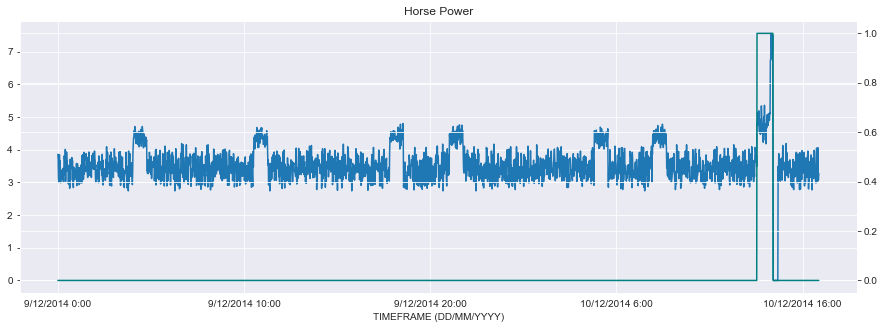

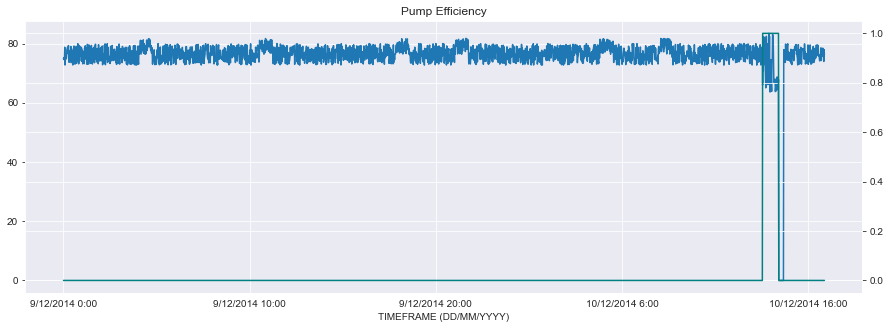

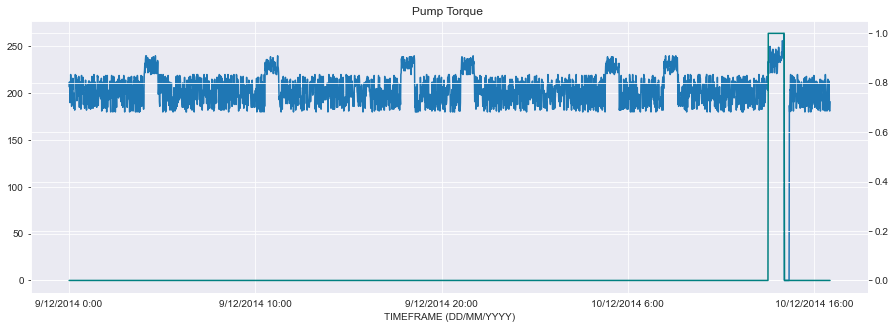

In [108]:
for item in ListOfVariables:
    first_axis = dataframe_raw[item].plot() #Looping through every item in the dataframe.
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(5))
    second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
    second_axis.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color='teal')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.title(item)
    plt.gcf().set_size_inches(15, 5)
    plt.show()

we can notice that certain variables trend upwards in relation to a pump failure. We are still unable to tell
which variables might be reacting more strongly to the Pump Failure than others.

---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 


In [94]:
dataframe_stdev = pd.read_csv("DF_Rolling_stdev.csv", index_col='TIMEFRAME (DD/MM/YYYY)')

In [95]:
dataframe_stdev_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 12:00") & (dataframe_stdev.index <= "10/12/2014 14:30")]

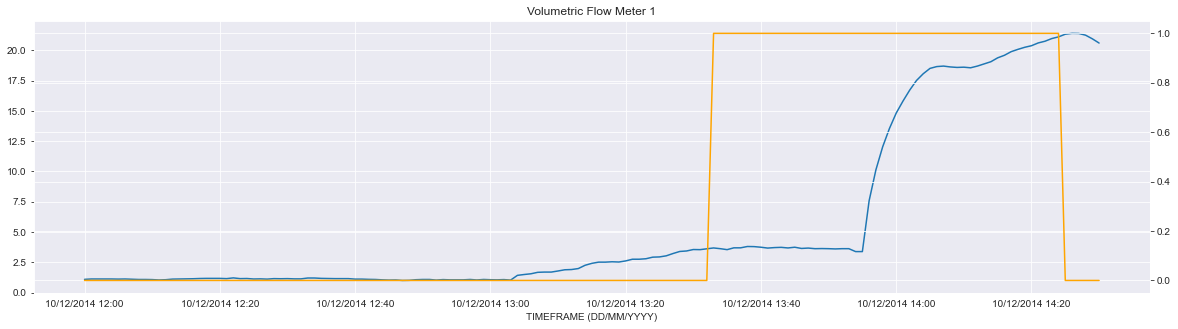

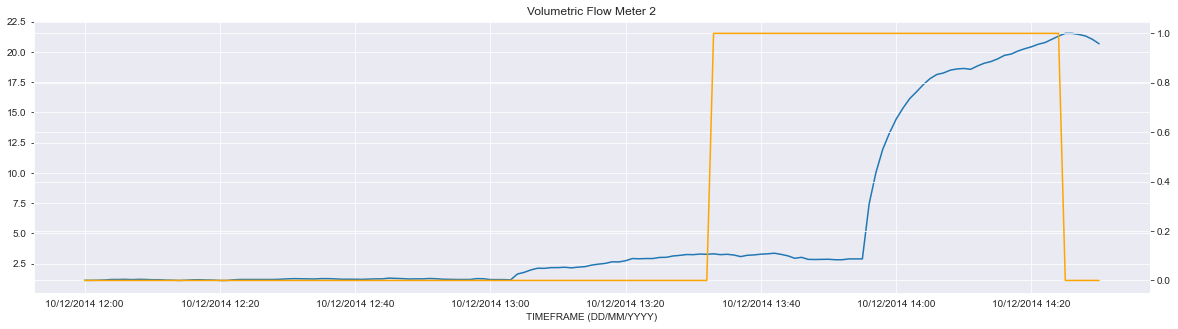

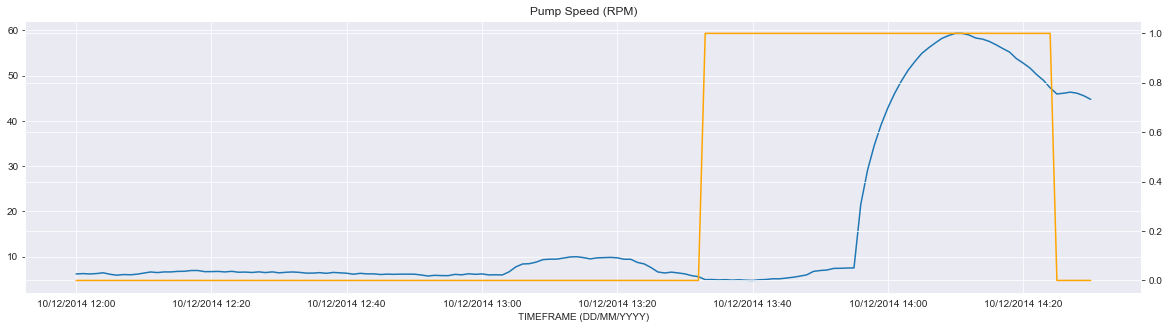

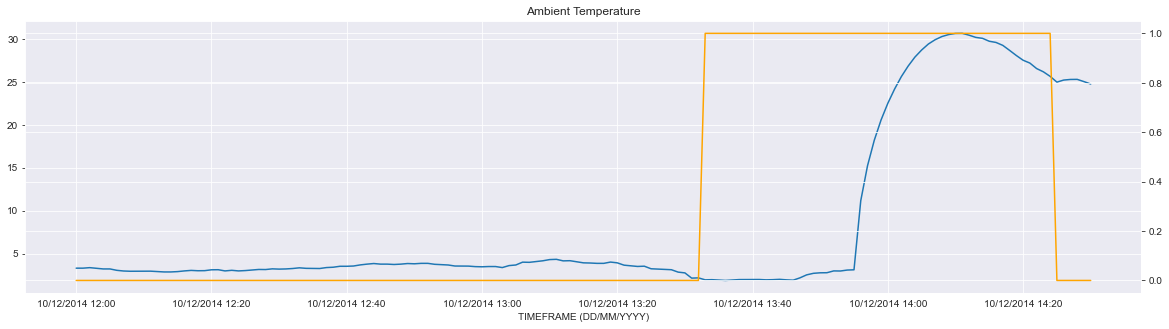

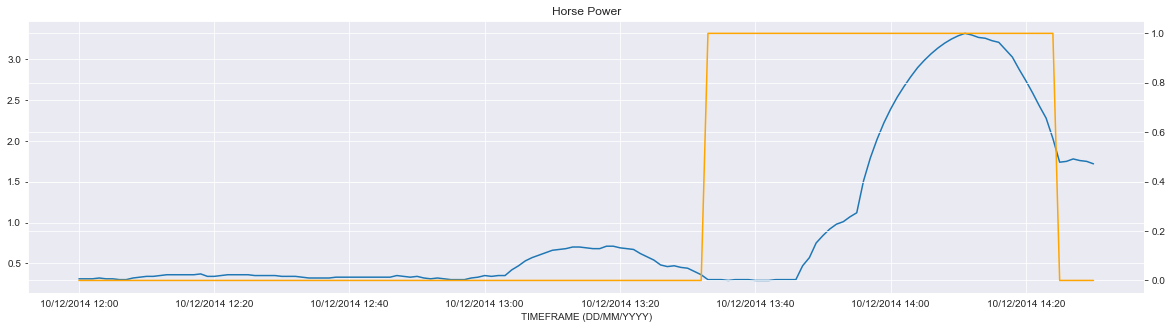

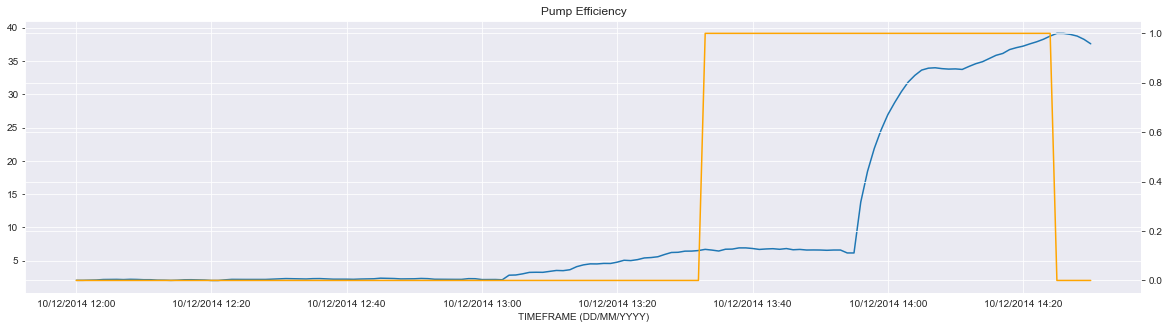

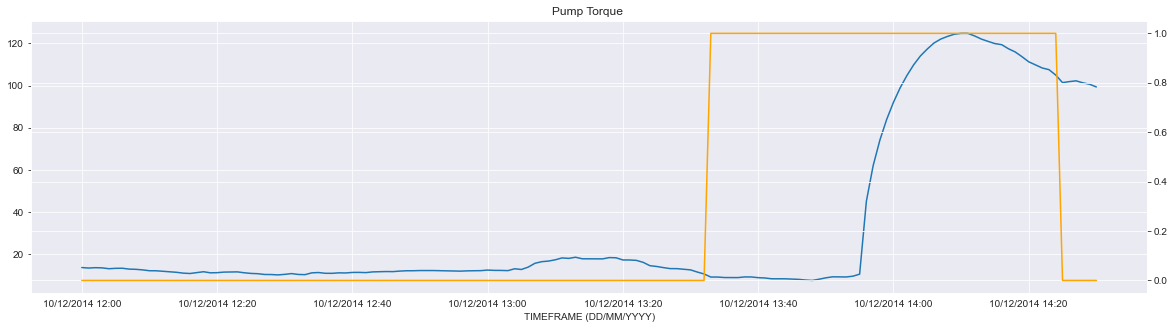

In [109]:
for ii in ListOfVariables:
    axis1 = dataframe_stdev_filtered[ii].plot() #We are looping through every item in the dataframe.
    axis1.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
    axis2 = axis1.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
    axis2.plot(dataframe_stdev_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    axis2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(ii)
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 10: <span style="color:purple">Create a Heatmap</span> 

<AxesSubplot:>

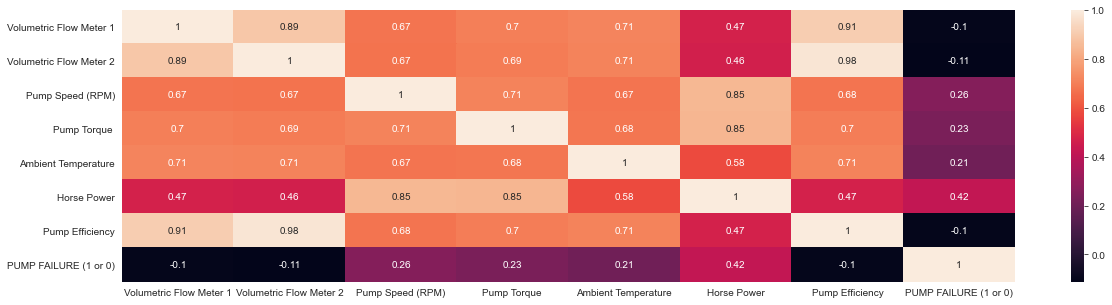

In [9]:
raw_corr=dataframe_raw.corr()
sns.heatmap(raw_corr, annot=True)

**Which variables seem to correlate with Pump Failure?**


The dataset does not 


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>

In [10]:
raw_corr

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


In [31]:
rc=raw_corr.iloc[-1,:]
sorted_rc=rc.sort_values(ascending=False)

Text(0.5, 1.0, 'Correlated Bar Plot (Raw Data)')

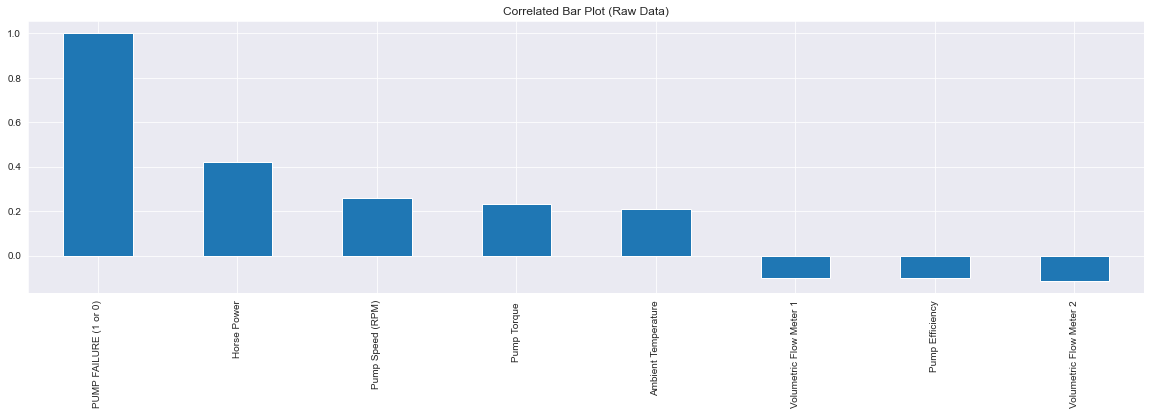

In [30]:
sorted_rc.plot(kind='bar')
plt.title('Correlated Bar Plot (Raw Data)')

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 


## Please put your code here

<AxesSubplot:>

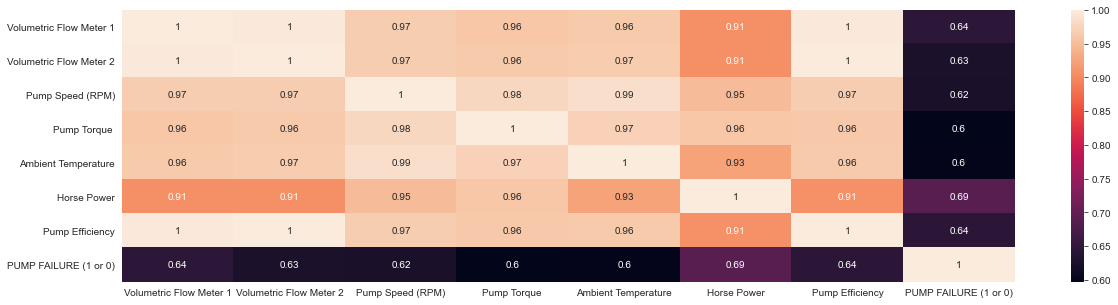

In [33]:
std_corr=dataframe_stdev.corr()
sns.heatmap(std_corr, annot=True)

Horse Power and Pump efficiency show strong positive correlation in the Rolling Stde Dataset. 

### Creating a Multivariate Regression Model


### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

    1. Establish two DataFrames named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to the dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat process using the dataframe_stdev.</b>


## Please put your code here 

In [385]:
from statsmodels.formula.api import ols

In [377]:
independent_variable_r = sm.add_constant(dataframe_raw.iloc[:,-8:-1])
dependent_variable_r = pd.DataFrame(dataframe_raw['PUMP FAILURE (1 or 0)'])                                       

In [378]:
regression_model1 = sm.OLS(dependent_variable_r, independent_variable_r).fit() 
regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Wed, 01 Dec 2021   Prob (F-statistic):          5.58e-233
Time:                           18:01:03   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [435]:
independent_variable_s = sm.add_constant(dataframe_stdev.iloc[:,-8:-1])
dependent_variable_s = pd.DataFrame(dataframe_stdev['PUMP FAILURE (1 or 0)']) 

In [436]:
regression_model2 = sm.OLS(dependent_variable_s, independent_variable_s).fit() 
regression_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                           18:24:17   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R Squared (0.78) for the model created with dataframe_stdev is fairly good.
It means that 78% of our values fit the regression model. 
In other words, 78% of the dependent variables are explained by the independent variables.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

<AxesSubplot:>

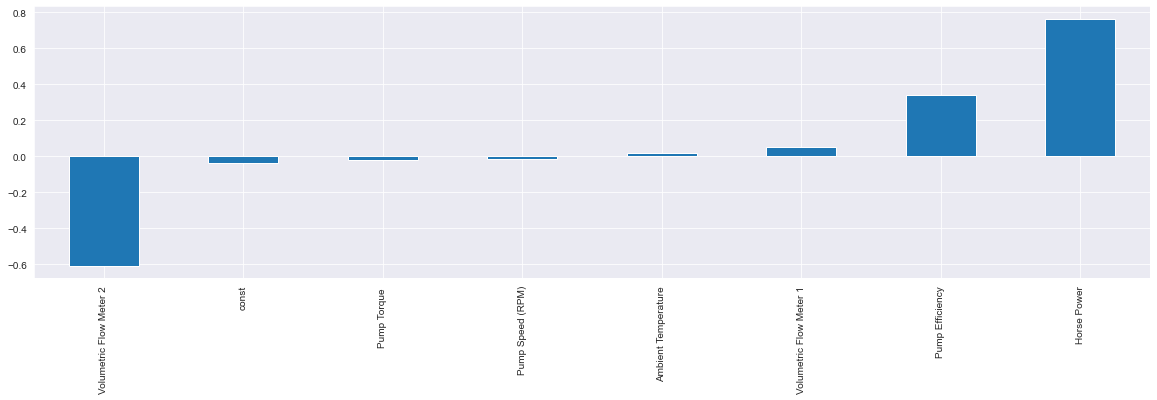

In [105]:
a0=regression_model2.params.sort_values(ascending=True)
a0.plot(kind='bar')


### Step 15: <span style="color:purple">Validate Predictions</span> 


In [449]:
dataframe_stdev['Prediction']= regression_model2.predict(independent_variable_s) 

In [450]:
MyList1 = ['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']
MyList2 = ['PUMP FAILURE (1 or 0)', 'Prediction']

In [451]:
a8=dataframe_stdev.set_index(['TIMEFRAME (DD/MM/YYYY)'])

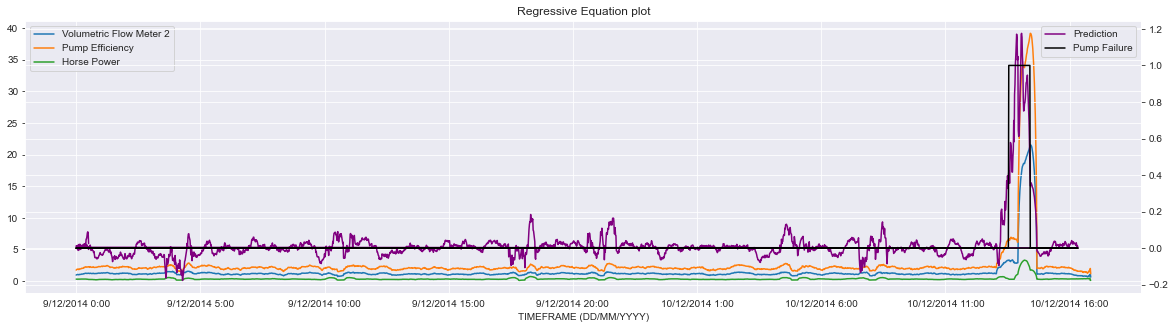

In [480]:
axis1 = a8[MyList1].plot()
axis2 = axis1.twinx()
axis2.plot(a8['Prediction'], color='purple', label='Prediction')
axis2.plot(a8['PUMP FAILURE (1 or 0)'], color='black', label='Pump Failure')
axis2.xaxis.set_major_locator(plt.MaxNLocator(9))
plt.legend()
plt.title('Regressive Equation plot')
plt.show()